<div align="center">
<h1>
Python for Social Science Workshop - Lesson 3
</h1>
</div>
<br />
<div align="center">
<h3>
Jose J Alcocer
</h3>
</div>
<br />
<div align="center">
<h4>
April 18, 2023
</h4>
</div>

***

# Univariate and Multivariate Regressions <br>

<br>

This lesson will be covering applications of regressions using multiple datasets. The first part of this lesson will give a brief summary of the linear regression estimator to provide a refresher.

<br> <br>

## 1.0 Summary of Linear Regression Estimator <br> <br>

### What is Linear Regression? <br>

Linear Regression is a statistical method used to capture linear relationships between two (or more) variables. <br>

The model consists of: <br>

* A dependent or outcome variable (**Y**) that denotes what we want to explain;
* An independent or explanatory variable(s) (**X**) that denotes what we think explains a change in our outcome variable <br>

An example of this can be the effect of education (**X**) on income (**Y**). <br> <br>

### Choosing the Best Line <br>

We strive to find the best fitting line as it allows us to:

* Make predictions using new explanatory observations
* Describe important relationships between explanatory and outcome variables
* Make causal effect estimates (so long as our explanatory variable is randomly assigned) <br>

The equation that gets us the best fitting line is: <br>

$$ \( Y_{i} = \beta_{0} + \beta_{1}X_{i} + \varepsilon_{i} \) $$ <br>

Where: <br>

* The $\beta_{0}$ is the intercept or constant term; this tells us what our Y is when our X = 0, <br>
* The $\beta_{1}$ is the slope coefficient; this tells us how much Y is affected by X, and <br>
* The $\varepsilon$ is the error term; this represents all that is unobserved in this equation <br> <br>

### How Do We Get the Best Line? <br>

With so many possible lines, how exactly do we select the best one? <br>

We select the combination of intercept $(\(\beta_{0}\))$ and coefficient $(\(\beta_{1}\))$ values from our line equation ($\( Y_{i} = \beta_{0} + \beta_{1}X_{i} + \varepsilon_{i} \)$) that minimizes our sum of squared residuals (SSR). <br>

The **sum of squared residuals** is non-other than the difference between our actual outcomes $(\(Y_{i}\))$ and our predicted outcomes $(\(\hat{Y_{i}}\))$ generated by an iteration of a line equation being tested. <br>

$$ SSR =  \( \sum_{i=1}^{n}(Y_{i} - \hat{Y_{i}})^2 \) $$ <br>

One doesn't have to worry about how this formula is derived to obtain the ideal values, as we have statistical software help us; but, if interested then this [link](https://online.stat.psu.edu/stat501/lesson/1/1.2) shows how it is done. In addition, this [link](https://online.stat.psu.edu/stat501/lesson/1) provides an excellent review/introduction to regressions for those who may need it.<br> <br>

Let's apply this estimator in Python using a made-up example to start off and then move onto to real-world datasets.

## 1.1 Setting Up the Environment <br>

Let's download the library packages we will be using for this lesson. The package that will allow us to run regressions in Python is the `statsmodels` library.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

Let's also import the first dataset we will be using.

In [3]:
# Importing the dataset
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary,Sex
0,1.1,39343,Female
1,1.3,46205,Male
2,1.5,37731,Male
3,2.0,43525,Female
4,2.2,39891,Female


## 2.0 Univariate Regression <br>

The imported dataset reports year of experience at a certain job, their salary, and if the person is a woman. Suppose we want to run a regression where we are interested in understanding how years of work experience can affect one's salary. We would have to regress salary on years of experience. Before doing that exactly, let's begin by visualizing our data relationship. <br>

We can visualize data by using the seaborn function `sns.regplot` and adding additional aesthetics.

Text(0, 0.5, 'Salary (Dollars)')

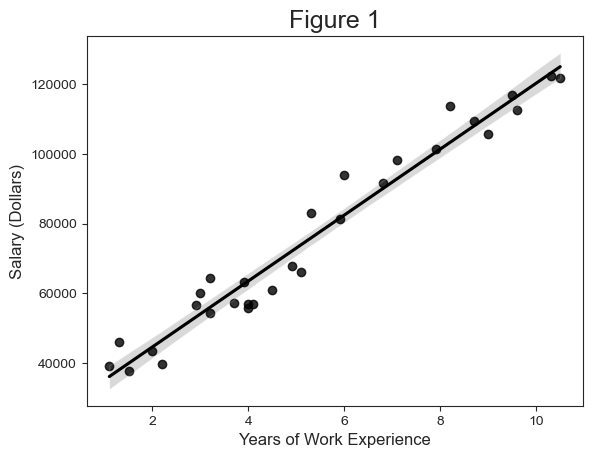

In [4]:
# Set theme
sns.set_style('ticks')
plot = sns.regplot(x='YearsExperience', y='Salary', data= df, color='black')
# Adding title and labels
plot.set_title('Figure 1', fontdict={'size': 18, 'weight': 'normal'})
plot.set_xlabel('Years of Work Experience', fontdict={'size': 12})
plot.set_ylabel('Salary (Dollars)', fontdict={'size': 12})

Our initial visualization of the data shows that there may be a linear relationship between both years of work experience and salary. We can also see that our data appears homoskedastic (_there is no apparent variance or sparsity in the data observations_). Let's continue by fitting the model and running our regression.

In [5]:
# Running the regression
model = smf.ols('Salary ~ YearsExperience', data=df).fit()

# Presenting a table summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        14:23:08   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     

The `model.summary()` commands presents us with a nicely formatted table displaying a lot of information. Let's dissect it. <br> <br>

### 2.1 Interpreting the Results

#### 2.1.1 Top Section of Regresion Results

The top section of the regression summary contains data on what was done and what was calculated in the regression model. <br>

Starting with the left column of information, the summary tells us what our outcome variable of interest was (_in this case it was the salary of each individual_), followed by the model and method that was used to get the results (_in this case, it was an ordinary least squares regression that obtained the intercept and coefficient results by minimizing the sum of squared residuals_). <br>

It then displays system information (the time and date that the regression was done) and it ends with some information about the dataset that it used to calculate the results (_the total number of observations in the dataset was 30 and the 'df residuals' is simply the total number of observations of the dataset subtracted by the number of variables being estimated_). <br>

The last input on the left column displays what kind of covariance measure the model accounted for. Here, we have 'nonrobust', which is the default type of covariance measure that does not account for any Heteroskedasticity or Heteroskedasticity-Autocorrelation present in the data. We will run a different kind of regression that does account for these two later. <br>

The right column of the top section continues to display data related to the regression model built. <br>

Starting with the first two measures, the R-squared measures how well the line we found fits the data and explains the relationship. The R-squared gives us the percentage amount of variation explained by our regression line created. It uses the Sum of Squared Residuals (SSR) we calculated earlier to obtain this value. It does by dividing that SSR by the Total Sum of Sqaures (TSS), and it is denoted with the following equation: <br>

$$ R^2 = 1 - \frac{SSR}{TSS} $$ <br>

If you are interested in knowing how the TSS is calculated, this three-minute [YouTube video](https://www.youtube.com/watch?v=A6OZMqdJHcc) explains it quite well. <br>

Because our R-Squared metric ranges from 0 to 1, we can interpret a value closer to 1 as a higher value that explains the relationship between the data. A value closer to 0 would suggest that our regression does not explain the relationship between the variables. <br>

The adjusted R-Squared is a modified version of the R-Squared that takes into account additional predictors that may be present in the model. Here, because we only have one independent variable, our Adjusted R-Squared does not vary by much. If you are interested in re-familiarizing yourself with these two concepts, the following two links are good resources to do so. <br>

* [Towards Data Science article](https://towardsdatascience.com/r-squared-vs-adjusted-r-squared-simplified-543993e69558)
* [Statology article](https://www.statology.org/adjusted-r-squared-interpretation/) <br>

The F-Statistic measures the ratio of the mean squares treatment over the means squares error. It essentially measures the variation between sample means relative to the variation found within the samples used in the regression. Having a large F-Statistic value would suggest that there is evidence of a difference between the group means (_you can reject the null hypothesis of no effect_) <br>

The Probability (F-Statistic) is none other than our collective p-value for our regression results. Per conventional standards, if our Prob. F-Statistic is lower than 0.05, then we can reject the null hypothesis of no effect (_meaning our results are statistically significant_). <br>

We will ignore the last three measures as we do not need to understand these measures for our purposes. <br> <br>

#### 2.1.2 Middle Section of Regression Results <br>

The midsection of the regression summary is the most important, as this section displays our intercept and coefficient details. Let's interpret what we are seeing. <br>

The first column displays all the variables that were inputted into the regression model. In this case, we only have our intercept and our years of experience variable. <br>

The intercept is the value that our regression model equation produces if all independent variables were set to 0. <br>

'YearsExperience' is our variable of interest and here we can see the beta coefficient's effect on salary. One would interpret this value as: an additional year of work experience is associated with an estimated increase of $9,450 dollars on one's salary, holding all else constant (that's a big jump). <br>

The second column displays the standard errors (SEs) associated with the beta coefficients in our model. The standard error metric measures the sampling variation from our sample estimates (n) to the true population (N) that is unobserved. In other words, it is an indication of how well our sample estimates can be in relation to our beta coefficient(s). The higher the SE, the larger the variation from our sample to the true population pool. How does this relate to our estimated effects. If the SE of a coefficient were to be close to its estimated effect, then it would be assumed that the difference is close to none, making it indistinguishable from zero (non-significant effect). If the SE of a coefficient is not remotely close to our coefficient, then it can be suggested that our effect is rather large and therefore distinguishable from zero (significant effect). Because our coefficient is rather large from the SE, we can assume that there are distinguishable effects present. <br>

The third column displays the test statistic, which is the coefficient divided by the standard error. <br>

In order to get our p-value, one would need to take our test statistic and look at the t-distribution table with n-1 degrees of freedom to get that value. Luckily, the fourth column does that for us and presents the p-value of the beta coefficient estimate. Under arbitrary but conventional norms of significance, if our p-value is less than 0.05, then we can deem our coefficient as statistically significant. <br>

The last column displays the beta coefficient's values within 95% of our data (or within 2 standard deviations of it). This is known as our confidence intervals. <br> <br>

#### 2.1.3 Bottom Section of Regression Results <br>

While the bottom section of the results contains multiple measures, the most important one to know is the Durbin-Watson measure. This measure tells us about the regression's amount of homoscedasticity, or how even are the distribution of errors in the data. Having a value between 1 and 2 would suggest that there is an acceptable amount of even distribution, or no presence of Heteroskedasticity.


## 3.0 Multivariate Regression <br>

Suppose we wanted to introduce an additional variable into our regression: the sex of the individual. We would then have to regress salary on years of experience and sex. Before doing that exactly, let's begin by visualizing our data relationship using one continuous and categorical variable. <br>

While the previous example used `sns.regplot()` to plot our regression visualization, we will be using `sns.lmplot()` this time, as it will allow us to add a categorical component. There are two ways to plot a regression line, depending on how you want to convey the data. <br> <br>

#### Method A: Both Lines In Same Plot

<Figure size 800x600 with 0 Axes>

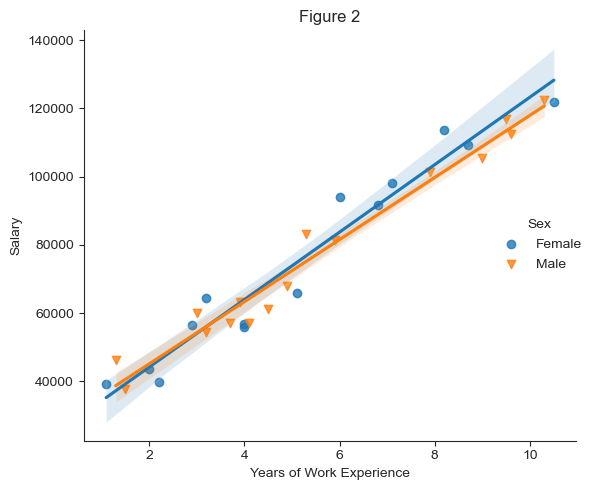

<Figure size 800x600 with 0 Axes>

In [6]:
# Set theme
sns.set_style('ticks')

# Plot itself
plot = sns.lmplot(x='YearsExperience', y='Salary', data= df, hue ='Sex', markers =['o', 'v'])

# Plot title and axis labels
plt.title('Figure 2')
plt.ylabel("Salary")
plt.xlabel("Years of Work Experience")

# Adjust x limits
#plt.xlim(1,10)

# Remove legend from outer layer to innner
plt.tight_layout()

# Set plot size for display
plt.figure(figsize=(8, 6))

#### Method B: Two Different Plots

<Figure size 800x600 with 0 Axes>

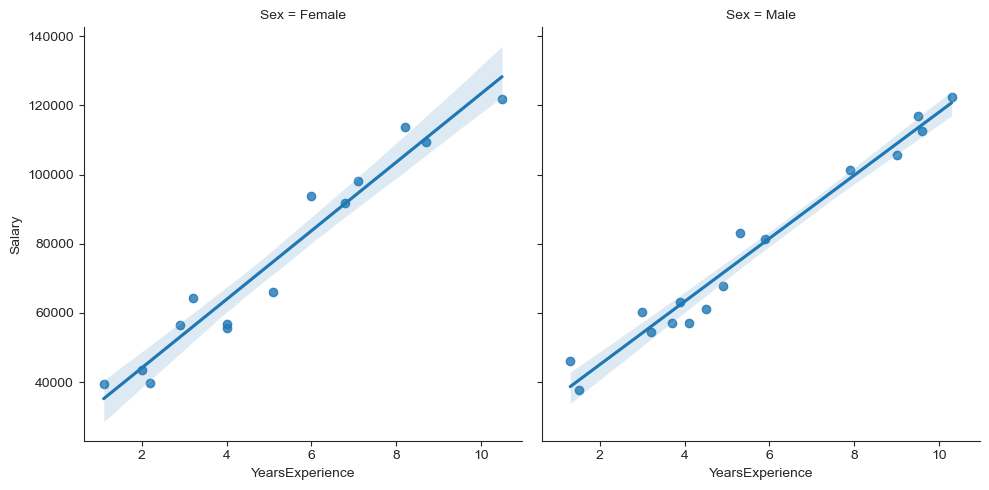

<Figure size 800x600 with 0 Axes>

In [7]:
# Set theme
sns.set_style('ticks')

# Plot itself
plot = sns.lmplot(x='YearsExperience', y='Salary', data= df, col ='Sex')

# Remove legend from outer layer to innner
plt.tight_layout()

# Set plot size for display
plt.figure(figsize=(8, 6))

Now, let's run the regression. There are multiple ways to run a regression with a categorical variable as an additional independent variable. We will cover a few of those ways. <br> <br>

#### Method 1: Straight Forward Plugging Variables In <br>

Here, our coefficient tells us what the relationship between sex and salary is. Python automatically chooses one of the categories, and it gives us that relationship. Useful and easy, but not as modular if you were interested in having more control over what actually gets captured.


In [8]:
# Running the regression
model = smf.ols('Salary ~ YearsExperience + Sex' , data=df).fit()

# Presenting a table summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     306.9
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           2.71e-19
Time:                        14:32:00   Log-Likelihood:                -301.12
No. Observations:                  30   AIC:                             608.2
Df Residuals:                      27   BIC:                             612.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.656e+04   2505.089     

#### Method 2: Specifying A Category <br>

An alternative way to let Python know you are working with a categorical variable is by using the `C()` operator within the regression. As we can see, we are still having Python choose the variable for us.

In [9]:
# Running the regression
model = smf.ols('Salary ~ YearsExperience + C(Sex)' , data=df).fit()

# Presenting a table summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     306.9
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           2.71e-19
Time:                        14:32:43   Log-Likelihood:                -301.12
No. Observations:                  30   AIC:                             608.2
Df Residuals:                      27   BIC:                             612.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.656e+04   2505.089     

#### Method 3: Manipulating the DataFrame to Create our Own Set of Dummies <br>

A third way to let Python know you are working with a categorical variable is by creating a new variable that is a dummy of women. There are two ways to do this: (A) the long way, and (B) the short way. Let's cover both of them. <br> <br>

#### 3A: The Intuitive But Long Way

In [ ]:
# Show DataFrame
df.head()

In [10]:
# Create an empty list
list = []

# Use a for-loop and if-else statement
for x in df['Sex']:     # For every observation (row) in the variable, Sex
    if x == 'Female':   # If the observation (row) in the variable, Sex, is equal to 'Female'
        list.append(1)  # Add a 1 to nth observation in the list we created
    else:
        list.append(0)  # If it doesn't say "Female", add a 0 to that nth observation

# Create a new variable and assign that list we created
df['Female'] = list

# Confirm that the variable is present
print(df)

# Running the regression
model = smf.ols('Salary ~ YearsExperience + Female' , data=df).fit()

# Presenting a table summary
print(model.summary())

    YearsExperience  Salary     Sex  Female
0               1.1   39343  Female       1
1               1.3   46205    Male       0
2               1.5   37731    Male       0
3               2.0   43525  Female       1
4               2.2   39891  Female       1
5               2.9   56642  Female       1
6               3.0   60150    Male       0
7               3.2   54445    Male       0
8               3.2   64445  Female       1
9               3.7   57189    Male       0
10              3.9   63218    Male       0
11              4.0   55794  Female       1
12              4.0   56957  Female       1
13              4.1   57081    Male       0
14              4.5   61111    Male       0
15              4.9   67938    Male       0
16              5.1   66029  Female       1
17              5.3   83088    Male       0
18              5.9   81363    Male       0
19              6.0   93940  Female       1
20              6.8   91738  Female       1
21              7.1   98273  Fem

#### 3B: The Easy Way

In [11]:
# Importing the dataset to clear it
df = pd.read_csv('Salary_Data.csv')

# Use pd.get_dummies to generate dummy variables out of Sex variable
# You can use the argument 'drop_first=True' to drop whatever is the first dummy variable
#   created
Sex = pd.get_dummies(df['Sex'], drop_first=False)

# Join new dataset with original one using 'df.join'
# Unlike concat and merge, join command forces a join without any logic, this only works
#   if your rows are aligned well
df = df.join(Sex)

# Running the regression
model = smf.ols('Salary ~ YearsExperience + Female' , data=df).fit()

# Presenting a table summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     306.9
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           2.71e-19
Time:                        14:34:53   Log-Likelihood:                -301.12
No. Observations:                  30   AIC:                             608.2
Df Residuals:                      27   BIC:                             612.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.494e+04   2551.242     

### 3.1 Multivariate Regression with Interaction Terms <br>

Suppose we wanted to know what are the effects of women and years of work experience on salary. Regressions tend to hold variables constant, so unless we tell python to interact both of them at the same time, we will not be able to observe the effect of both variables together. <br>

We can do this by using the '*' operator within the regression function. <br>

In [12]:
# Running the regression
model = smf.ols('Salary ~ YearsExperience*Female' , data=df).fit()

# Presenting a table summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     205.3
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           3.25e-18
Time:                        14:37:24   Log-Likelihood:                -300.53
No. Observations:                  30   AIC:                             609.1
Df Residuals:                      26   BIC:                             614.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2.68

### 3.2 Multivariate Regression with Robust Standard Errors <br>

In addition, we can specify to Python that we want robust standard errors by inserting the "cov_type = 'HC1'" argument in the `.fit()` function.

In [13]:
# Running the regression
model = smf.ols('Salary ~ YearsExperience * Female' , data=df).fit(cov_type='HC1')

# Presenting a table summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     321.1
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           1.18e-20
Time:                        14:39:11   Log-Likelihood:                -300.53
No. Observations:                  30   AIC:                             609.1
Df Residuals:                      26   BIC:                             614.7
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2.68

### 3.3 Running Multiple Models and Presenting Them in A Table <br>

Suppose we want to compare different regression models and present them in a more organized table. There are two methods that can allow us to do this. <br> <br>

#### Method 1: Using Statsmodel Summary Col

In [14]:
# Import summary_col package
from statsmodels.iolib.summary2 import summary_col

In [15]:
## Run three separate regression models
# Reg 1
model1 = smf.ols('Salary ~ YearsExperience' , data=df).fit()
# Reg 2
model2 = smf.ols('Salary ~ YearsExperience + Female' , data=df).fit()
# Reg 3
model3 = smf.ols('Salary ~ YearsExperience * Female' , data=df).fit()

dfoutput = summary_col([model1,model2,model3],stars=True, float_format='%0.2f',
                       regressor_order=model1.params.index.tolist())
print(dfoutput)

# Use this to produce the table as LaTeX and copy/paste it to get actual table
#dfoutput.as_latex()


                         Salary I   Salary II   Salary III
----------------------------------------------------------
Intercept              25792.20*** 24937.74*** 26866.59***
                       (2273.05)   (2551.24)   (3170.71)  
YearsExperience        9449.96***  9467.97***  9115.67*** 
                       (378.75)    (382.38)    (514.37)   
Female                             1625.96     -2526.15   
                                   (2138.56)   (4587.16)  
YearsExperience:Female                         785.80     
                                               (768.21)   
R-squared              0.96        0.96        0.96       
R-squared Adj.         0.96        0.95        0.95       
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


#### Method 2: Using Stargazer Library (Originally R Package Now Adapted For Python) <br>

The github repo for this package can be found [here](https://github.com/mwburke/stargazer).

In [16]:
## Install package from CRAN
# pip install stargazer

# Import library package to workspace
from stargazer.stargazer import Stargazer, LineLocation

# Use previous models to create the table
stargazer = Stargazer([model1,model2,model3] )

# Specify significant digits
stargazer.significant_digits(2)

stargazer

Here, we notice that our coefficients are a little wonky, as Python places them in alphabetical order. But, if we wanted them in a more traditional format, we can also specify it to the stargazer package.

In [17]:
stargazer.covariate_order(['Intercept', 'YearsExperience', 'Female', 'YearsExperience:Female'])
stargazer

# The table we see below is HTML, if we want the code for that, all we need to execute is
# stargazer.render_html()

Lastly, we can also render the table as LaTeX for easy exporting.

In [18]:
print(stargazer.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{3}{c}{\textit{Dependent variable:}} \
\cr \cline{3-4}
\\[-1.8ex] & (1) & (2) & (3) \\
\hline \\[-1.8ex]
 Intercept & 25792.20$^{***}$ & 24937.74$^{***}$ & 26866.59$^{***}$ \\
  & (2273.05) & (2551.24) & (3170.71) \\
 YearsExperience & 9449.96$^{***}$ & 9467.97$^{***}$ & 9115.67$^{***}$ \\
  & (378.75) & (382.38) & (514.37) \\
 Female & & 1625.96$^{}$ & -2526.15$^{}$ \\
  & & (2138.56) & (4587.16) \\
 YearsExperience:Female & & & 785.80$^{}$ \\
  & & & (768.21) \\
\hline \\[-1.8ex]
 Observations & 30 & 30 & 30 \\
 $R^2$ & 0.96 & 0.96 & 0.96 \\
 Adjusted $R^2$ & 0.96 & 0.95 & 0.95 \\
 Residual Std. Error & 5788.32(df = 28) & 5832.43(df = 27) & 5827.43(df = 26)  \\
 F Statistic & 622.51$^{***}$ (df = 1.0; 28.0) & 306.85$^{***}$ (df = 2.0; 27.0) & 205.27$^{***}$ (df = 3.0; 26.0) \\
\hline
\hline \\[-1.8ex]
\textit{Note:} & \multicolumn{3}{r}{$^{*}$p$<$0.1; $^{**}$p$<$

### 3.3 Multivariate Regression Using Real Data <br> <br>

#### Example 1 <br>

Let's use a more real world example of data. The following data is from Zhou and Shaver's (2021) article, ['Reexamining the Effect of Refugees on Civil Conflict: A Global Subnational Analysis'](https://www.cambridge.org/core/journals/american-political-science-review/article/reexamining-the-effect-of-refugees-on-civil-conflict-a-global-subnational-analysis/9FB2BBEA2E2DC15560F367677C3D284E#article), and they seek to understand (among other things) whether the presence of refugees cause more conflict within states. While their paper conducts different analyses, the one we will be replicating is their robust regression of refugee presence on amount of Violent Events. The regression equation they use to estimate these effects is:  <br> <br>

$$ ViolentEvents_{i,t} = \beta_0 + \beta_1 RefugeePresence_{i,t} + \beta_2 RefugeePresenceinOtherProvinces_{i,t}  + $$
$$ \beta_3 LaggedViolentEvents_{i,t} + \beta_4 NeighboringViolentEvents_{i,t} + $$
$$ \beta_5 LaggedPopulation_{i,t} + \beta_6 LaggedGDP_{i,t} + \beta_7 TerrainRuggedness_{i} + $$
$$ \beta_8 ProvinceSize_{i} + \beta_9 BorderDistance_{i} + \beta_{10} CapitalDistance_{i} +  $$
$$ \beta_{11} IDPPresence_{i,t} + CountryFixedEffects + YearFixedEffects + \varepsilon_{i,t} $$

Let's import the data and view it.

In [19]:
df = pd.read_csv('panel.full_GED_2020.csv')
df.head()

,GMI_ADMIN,GMI_CNTRY,CNTRY_NAME,ADMIN_NAME,Country,Year,attack,attack_state_based,attack_non_state,attack_one_sided,...,no_new_site_rs_1,no_new_site_rt_2,no_new_site_rc_2,no_new_site_rs_2,nearborder,nearcapital,TotalRoadLength,RoadDensity,TotalRoadLength_km,year
0,AFG-BAM,AFG,Afghanistan,Bamian,Afghanistan,1990-01-01,0.0,0.0,0.0,0.0,...,0,0,0,0,0.0,1.0,NaN,NaN,NaN,1990
1,AFG-BAM,AFG,Afghanistan,Bamian,Afghanistan,1991-01-01,0.0,0.0,0.0,0.0,...,0,0,0,0,0.0,1.0,NaN,NaN,NaN,1991
2,AFG-BAM,AFG,Afghanistan,Bamian,Afghanistan,1992-01-01,0.0,0.0,0.0,0.0,...,0,0,0,0,0.0,1.0,789914.4805,0.041157,789.91448,1992
3,AFG-BAM,AFG,Afghanistan,Bamian,Afghanistan,1993-01-01,0.0,0.0,0.0,0.0,...,0,0,0,0,0.0,1.0,NaN,NaN,NaN,1993
4,AFG-BAM,AFG,Afghanistan,Bamian,Afghanistan,1994-01-01,0.0,0.0,0.0,0.0,...,0,0,0,0,0.0,1.0,NaN,NaN,NaN,1994


The replication instructions tell us what variables were used for this regression analysis. Let's create a list object of those names and subset them.

In [20]:
var_list = ['attack','rtb','rtb.other','attack_1','attack_neighbors_sum', 'log_pop_1',
            'gcp_ppp_1', 'STD', 'SQKM_ADMIN', 'log_bdist2', 'log_capdist', 'idpb',
            'Country', 'year']
df = df[var_list]
df.head()

,attack,rtb,rtb.other,attack_1,attack_neighbors_sum,log_pop_1,gcp_ppp_1,STD,SQKM_ADMIN,log_bdist2,log_capdist,idpb,Country,year
0,0.0,0,0,NaN,2,NaN,NaN,221.432,19192.551,5.458124,5.258359,0,Afghanistan,1990
1,0.0,0,1,0.0,2,12.590328,0.234417,221.432,19192.551,5.458124,5.258359,0,Afghanistan,1991
2,0.0,0,1,0.0,0,12.666320,0.234417,221.432,19192.551,5.458124,5.258359,0,Afghanistan,1992
3,0.0,0,0,0.0,1,12.736942,0.234417,221.432,19192.551,5.458124,5.258359,0,Afghanistan,1993
4,0.0,0,1,0.0,20,12.802905,0.234417,221.432,19192.551,5.458124,5.258359,0,Afghanistan,1994


Before we move on to the main analysis, let's discuss some useful commands.

In [21]:
# This gives us a set of statistics across all variables in the dataset
# You can specify a few by indexing the df with those variables then placing describe after
# exammple: df['attack'].describe()
df.describe()

,attack,rtb,rtb.other,attack_1,attack_neighbors_sum,log_pop_1,gcp_ppp_1,STD,SQKM_ADMIN,log_bdist2,log_capdist,idpb,year
count,73215.000000,73527.000000,73527.000000,70679.000000,73527.000000,65819.000000,65324.000000,73527.000000,7.352700e+04,73179.000000,73179.000000,73527.000000,73527.000000
mean,2.247067,0.037184,0.247474,2.161689,6.220246,13.375119,19.890419,103.564727,5.203192e+04,4.664811,5.588554,0.003618,2004.002652
std,20.342200,0.189213,0.431547,19.792058,45.933583,1.678239,74.463542,86.645497,1.676880e+05,1.120037,1.084331,0.060039,8.365720
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.057000e+00,0.716082,1.019839,0.000000,1990.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,12.477365,0.701478,25.171700,3.943059e+03,3.876278,4.891450,0.000000,1997.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,13.450893,2.971663,84.933500,1.131859e+04,4.671915,5.645031,0.000000,2004.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,14.376565,9.336956,162.612000,3.908533e+04,5.391149,6.280998,0.000000,2011.000000
max,1986.000000,1.000000,1.000000,1986.000000,3472.000000,19.282600,1973.801000,459.845000,3.528428e+06,7.772757,8.948518,1.000000,2018.000000


We know that the country variable is categorical, so we can table it to see what countries are in our dataset

In [22]:
df['Country'].value_counts()

Russia           2351
Thailand         2088
Turkey           1943
Vietnam          1537
United States    1508
                 ... 
Macedonia          26
South Sudan        24
Nauru              20
Timor Leste        17
Montenegro         13
Name: Country, Length: 185, dtype: int64

We can also run correlations on variables we are interested in and provide aesthetic arguments to them. Here, we will just run a correlation on a few numeric variables in the dataframe.

In [23]:
# Storing the correlation in an object
corr = df[['attack','rtb','log_pop_1',
           'gcp_ppp_1']].corr(numeric_only=True) # this makes sure that it keeps numeric only

# Aesthetic mapping
corr.style.background_gradient(cmap='RdBu')

,attack,rtb,log_pop_1,gcp_ppp_1
attack,1.000000,0.040611,0.078641,-0.010595
rtb,0.040611,1.000000,0.081201,-0.032658
log_pop_1,0.078641,0.081201,1.000000,0.396185
gcp_ppp_1,-0.010595,-0.032658,0.396185,1.000000


Now, back to the main analysis. Let's run the regression.

In [24]:
model = smf.ols('attack ~ rtb + rtb.other + attack_1 + attack_neighbors_sum + log_pop_1 + gcp_ppp_1 + STD + SQKM_ADMIN + log_bdist2 + log_capdist + idpb + C(Country) + C(year)', data=df).fit()

print(model.summary())

PatsyError: Error evaluating factor: AttributeError: 'Series' object has no attribute 'other'
    attack ~ rtb + rtb.other + attack_1 + attack_neighbors_sum + log_pop_1 + gcp_ppp_1 + STD + SQKM_ADMIN + log_bdist2 + log_capdist + idpb + C(Country) + C(year)
                   ^^^^^^^^^

What happened? It appears that Python is not recognizing the name 'rtb.other' in the regression. Let's change the name of the variable and rerun it.

In [25]:
# Rename variable name
df.rename(columns={'rtb.other':'rtb_other'}, inplace=True)

In [26]:
# Rerun regression
model = smf.ols('attack ~ rtb + rtb_other + attack_1 + attack_neighbors_sum + log_pop_1 + gcp_ppp_1 + STD + SQKM_ADMIN + log_bdist2 + log_capdist + idpb + C(Country) + C(year)', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 attack   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     481.4
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:55:00   Log-Likelihood:            -2.5339e+05
No. Observations:               65012   AIC:                         5.072e+05
Df Residuals:                   64799   BIC:                         5.091e+05
Df Model:                         212                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------